After feature scaling, dimensionality addition and Regularisation : 
The value of thetha for batch gradient descent is :  [0.005589   0.04207981 0.0685921  0.04709375 0.04001644 0.06319842
 0.06181029 0.04328597 0.03751898] 
and the accuracy of batch gradient descent 93.33333333333333 %
The value of thetha for mini batch gradient descent is :  [0.00527364 0.04181704 0.06848451 0.04688109 0.03972323 0.06307557
 0.0616856  0.04299872 0.03720881] 
and the accuracy of mini batch gradient descent 93.33333333333333 %
The value of thetha for stocastic gradient descent is :  [0.00484389 0.08601287 0.14396754 0.09982973 0.08119511 0.13265882
 0.128412   0.09106271 0.07562189] 
and the accuracy of stocastic gradient descent 86.66666666666667 %


Text(0.5, 1, 'Stocastic gradient descent')

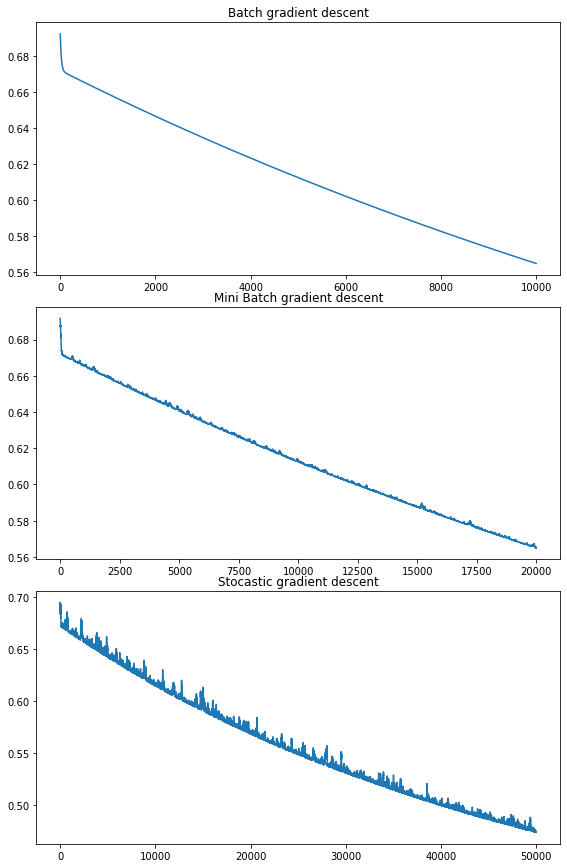

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 05:48:27 2020

@author: manavagrawal
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


"""Functions for calculing loss"""
def loss(X,y,hist):
    lossHist = list()
    for thethas in hist:
        loss = 0
        hofx = 1 / (1 + np.exp(-(thethas @ X.T)))
        loss = -(np.sum(y*np.log(hofx) + (1-y)*(np.log(1 - hofx))))
        lossHist.append(loss/len(X))
    return lossHist    
         
"""Function for batch gradient"""        
def bgd(x_train,y_train,epochs,thetha,learnRate):
    j = np.empty((epochs,len(thetha)))
    for i in range(epochs):
        j[i] = gradientDescent(x_train, y_train, thetha, learnRate)
        thetha = j[i]
    thetha = j[epochs-1]
    return j,thetha

"""Function for stocastic"""
def sgd(x_train,y_train,epochs2,thetha_stocastic,learnRate_stocastic):
    j = np.empty((epochs2,len(thetha_stocastic)))
    for i in range(epochs2):
        randIndex = np.random.randint(low = 0, high = trainSize)
        j[i] = gradientDescent(x_train[randIndex].reshape(1, -1), y_train[randIndex].reshape(1), thetha_stocastic, learnRate_stocastic)
        thetha_stocastic = j[i]
    return j

"""Function for mini batch"""
def mbgd(x_train,y_train,epochs3,thetha_mbatch,learnRate_mbatch,mbSize):
    j = np.empty((epochs3,len(thetha_mbatch)))
    nosBatch = trainSize//mbSize
    for i in range(epochs3):
        k = np.random.randint(low = 0,high = nosBatch)
        j[i] = gradientDescent(x_train[k*mbSize : (k+1)*mbSize], y_train[k*mbSize : (k+1)*mbSize], thetha_mbatch, learnRate_mbatch)
        thetha_mbatch = j[i]
    return j,thetha_mbatch
    
"""Helper Function for calculating gradient descent"""
def gradientDescent(x,y,t,learnRate):
    pred = 1 / (1 + np.exp(0 - (x @ t.T)))
    t = t - (learnRate/len(x))*((x.T @ (pred-y)) - (learnRate * t))
    return t

"""Dataset and splitting data"""
trainSize = 70
testSize = 30
np.random.seed(20)
dataset = pd.read_csv("examres.csv").to_numpy()
x_train = dataset[:trainSize,:2]
x1sq = np.asarray(x_train[:,0]**2)
x2sq = np.asarray(x_train[:,1]**2)
x1cub = np.asarray(x_train[:,0]**3)
x2cub = np.asarray(x_train[:,1]**3)
x1sqx2 = np.asarray(x1sq * x_train[:,1])
x2sqx1 = np.asarray(x2sq * x_train[:,0])
x1x2 = np.asarray((x_train[:,0] * x_train[:,1]))
x_train = np.column_stack((x_train,x1x2,x1sq,x2sq,x1sqx2,x2sqx1,x1cub,x2cub))
y_train = dataset[:trainSize,2]

"""Function  for feature Scaling"""
def featureScaling(x):
    features = x_train.shape[1]
    for i in range(1,features):
        x[:,i] = (x[:,i] - np.mean(x[:,i])) / np.std(x[:,i])
    return x
        
"""feature scaling of train data"""
x_train = featureScaling(x_train)

"""Training set"""
x_test = dataset[trainSize:,:2]
x1sqt = np.asarray(x_test[:,0]**2)
x2sqt = np.asarray(x_test[:,1]**2)
x1cubt = np.asarray(x_test[:,0]**3)
x2cubt = np.asarray(x_test[:,1]**3)
x1sqx2t = np.asarray(x1sqt * x_test[:,1])
x2sqx1t = np.asarray(x2sqt * x_test[:,0])
x1x2t = np.asarray((x_test[:,0] * x_test[:,1])) 
x_test = np.column_stack((x_test,x1x2t,x1sqt,x2sqt,x1sqx2t,x2sqx1t,x1cubt,x2cubt))
y_test = dataset[trainSize:,2]

"""feature scaling for test set"""
x_test = featureScaling(x_test)


"""Plotting graph"""
fig, axs = plt.subplots(3,1,figsize = (8,12))
fig.tight_layout()


print("After feature scaling, dimensionality addition and Regularisation : ")
"""Batch Gradient descent"""
epochs = 10000
alpha = 0.00002
thetha = np.zeros(9)   
hist,thetha = bgd(x_train,y_train,epochs,thetha,alpha)   
y_pred =   1 / (1 + np.exp( - x_test @ thetha.T))
roundedPred = list()
for num in y_pred:
    if num >= 0.50:
        roundedPred.append(1)
    else:
        roundedPred.append(0)
errors=0
for i in range(testSize):
    if roundedPred[i] != y_test[i]:
        errors += 1        
print("The value of thetha for batch gradient descent is : ",thetha,"\nand the accuracy of batch gradient descent",100 - errors/testSize * 100, "%")
axs[0].plot(range(epochs),loss(x_train, y_train, hist))
axs[0].set_title("Batch gradient descent")


"""Mini Batch gradient descent"""
epochs3 = 20000
alpha3 =  0.00001
thetha_mbatch = np.zeros(9)   
hist_batch,thetha_mbatch = mbgd(x_train,y_train,epochs3,thetha_mbatch,alpha3,5)
lossHist_mb = loss(x_train,y_train,hist_batch)
y_pred_mbatch =  1 / (1 + np.exp( - x_test @ thetha_mbatch.T))
roundedPred_mbatch = list()
for num in y_pred_mbatch:
    if num >= 0.5:
        roundedPred_mbatch.append(1)
    else:
        roundedPred_mbatch.append(0)
errors_mbatch = 0
for i in range(testSize):
    if roundedPred_mbatch[i] != y_test[i]:
        errors_mbatch += 1        
print("The value of thetha for mini batch gradient descent is : ",thetha_mbatch,"\nand the accuracy of mini batch gradient descent", 100 - errors_mbatch/testSize * 100,"%")
axs[1].plot(range(epochs3),lossHist_mb)
axs[1].set_title("Mini Batch gradient descent")


"""Stocastic Gradient descent"""
epochs2 = 50000
alpha2 = 0.0000095
thetha_stocastic = np.zeros(9)
hist_stocastic = sgd(x_train,y_train,epochs2,thetha_stocastic,alpha2)
lossHist_stocastic = loss(x_train, y_train, hist_stocastic)
thetha_stocastic = hist_stocastic[epochs2-1]
y_pred_stocastic = 1 / (1 + np.exp( - x_test @ thetha_stocastic.T))
roundedPred_stocastic = list()
for num in y_pred_stocastic:
    if num < 0.5:
        roundedPred_stocastic.append(0)
    else:
        roundedPred_stocastic.append(1)
errors_stocastic = 0
for i in range(testSize):
    if roundedPred_stocastic[i] != y_test[i]:
        errors_stocastic += 1        
print("The value of thetha for stocastic gradient descent is : ",thetha_stocastic,"\nand the accuracy of stocastic gradient descent", 100 - errors_stocastic/testSize*100,"%")
axs[2].plot(range(epochs2),lossHist_stocastic)
axs[2].set_title("Stocastic gradient descent")

